# Binomial Tree Pricing for American Options

This notebook demonstrates how the binomial tree model prices American options, allowing for early exercise at each node. We'll cover:
- How the binomial tree works
- Implementation for American call and put options
- Visualization of option value across the tree


## How the Binomial Tree Works

- **Underlying asset price** moves up or down at each time step.
- In the tree:
    - Up factor: $u = e^{\sigma \sqrt{\Delta t}}$
    - Down factor: $d = 1/u$
    - Risk-neutral probability:
      \[
      p = \frac{e^{(r - q)\Delta t} - d}{u - d}
      \]
    - Early exercise is possible at every node for American options.

We'll implement this for an American put option.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def american_option_binomial(S, K, T, r, sigma, q, N, option_type="put"):
    """
    Price an American option using the binomial tree.

    Parameters:
        S : float
            Initial stock price
        K : float
            Strike price
        T : float
            Time to maturity (years)
        r : float
            Risk-free rate
        sigma : float
            Volatility
        q : float
            Dividend yield
        N : int
            Number of steps
        option_type : str
            'call' or 'put'

    Returns:
        float
            Option price
    """
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp((r - q) * dt) - d) / (u - d)
    discount = np.exp(-r * dt)

    # initialize asset prices at maturity
    asset_prices = np.array([S * (u**j) * (d ** (N - j)) for j in range(N + 1)])

    # option values at maturity
    if option_type == "call":
        option_values = np.maximum(asset_prices - K, 0)
    else:
        option_values = np.maximum(K - asset_prices, 0)

    # backward induction
    for i in range(N - 1, -1, -1):
        asset_prices = asset_prices[: i + 1] / u
        option_values = (
            p * option_values[1:] + (1 - p) * option_values[:-1]
        ) * discount

        # check for early exercise
        if option_type == "call":
            exercise = np.maximum(asset_prices - K, 0)
        else:
            exercise = np.maximum(K - asset_prices, 0)
        option_values = np.maximum(option_values, exercise)

    return option_values[0]


# Example parameters
S = 100  # initial price
K = 100  # strike
T = 1  # maturity (1 year)
r = 0.05  # risk-free rate
sigma = 0.2  # volatility
q = 0.0  # dividend yield
N = 50  # tree steps

price_put = american_option_binomial(S, K, T, r, sigma, q, N, option_type="put")
price_call = american_option_binomial(S, K, T, r, sigma, q, N, option_type="call")

print(f"American Put Option Price: {price_put:.4f}")
print(f"American Call Option Price: {price_call:.4f}")

## Visualization of the Asset Price Tree

Let's visualize the possible paths of the underlying asset price.


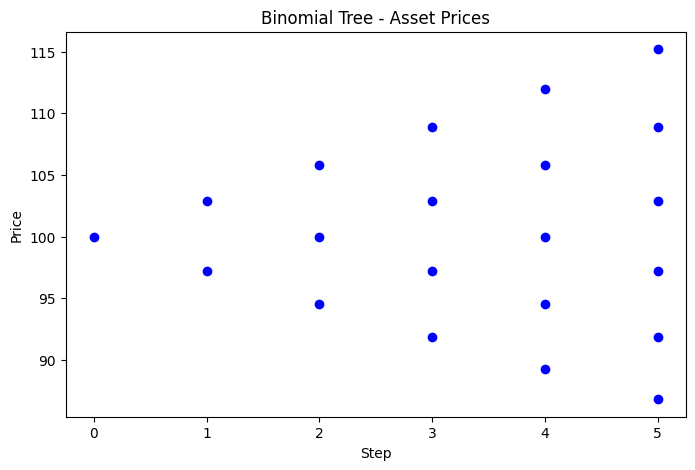

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def plot_binomial_tree(S, u, d, N):
    """
    Plot the asset price tree.

    Parameters:
        S : float
            Initial asset price
        u : float
            Up factor
        d : float
            Down factor
        N : int
            Steps
    """
    fig, ax = plt.subplots(figsize=(8, 5))
    for j in range(N + 1):
        prices = [S * (u**k) * (d ** (j - k)) for k in range(j + 1)]
        x_coords = np.full_like(prices, j)
        ax.scatter(x_coords, prices, color="blue")
    ax.set_title("Binomial Tree - Asset Prices")
    ax.set_xlabel("Step")
    ax.set_ylabel("Price")
    plt.show()


# The variables S, K, T, r, sigma, q, N and the function american_option_binomial are already defined in previous cells.


# Plot example tree
dt = T / N
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u

plot_binomial_tree(S, u, d, N=5)

## Conclusion
- The binomial tree is a powerful and known method for pricing American options.
- It models early exercise by checking the intrinsic value at each node.
- Increasing the number of steps improves accuracy, converging toward theoretical values.

This concludes our example on American options pricing with the binomial tree!
